In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Train Test Split

In [20]:
X = pd.get_dummies(df.drop('class', axis=1),drop_first=True)
y = df['class']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=9)

## Grid Search and GBOOST

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = {
    'n_estimators' : [1,3,5,10,20,50,100],
    'max_depth' : [2,3,4,5,6]
}

In [26]:
grad_boost = GradientBoostingClassifier()

In [27]:
grid = GridSearchCV(grad_boost, parameters)

In [28]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [1, 3, 5, 10, 20, 50, 100]})

In [29]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 50}

In [30]:
mantar_pred = grid.predict(X_test)

## Metrikler

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix

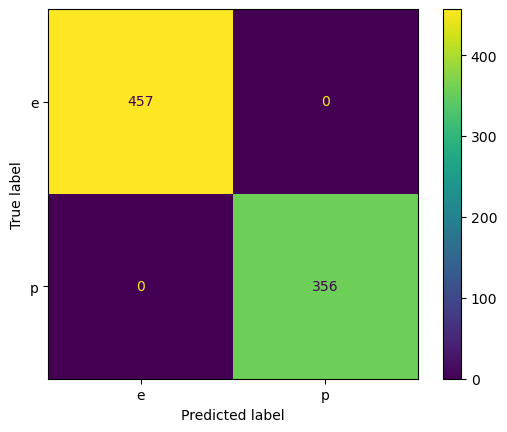

In [32]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [33]:
print(classification_report(y_test,mantar_pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       457
           p       1.00      1.00      1.00       356

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



In [34]:
feat = grid.best_estimator_.feature_importances_

In [35]:
feat_df = pd.DataFrame(index=X.columns,
     columns=['Katsayı'], data=feat)

In [36]:
feat_df

,Katsayı
cap-shape_c,4.948733e-04
cap-shape_f,1.624663e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,1.223932e-16
...,...
habitat_l,6.983346e-06
habitat_m,4.984286e-16
habitat_p,0.000000e+00
habitat_u,3.751890e-17


In [39]:
feat_df.sort_values('Katsayı', ascending=True).transpose()

,habitat_w,gill-color_h,gill-color_k,gill-color_o,gill-color_r,gill-color_w,gill-color_y,stalk-shape_t,ring-type_l,ring-type_f,...,stalk-root_e,odor_f,spore-print-color_h,stalk-root_r,spore-print-color_r,stalk-surface-below-ring_y,odor_p,bruises_t,stalk-root_c,odor_n
Katsayı,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.01211,0.014454,0.01492,0.029637,0.031355,0.03342,0.034025,0.080164,0.099815,0.61884


In [40]:
feat_df = feat_df[feat_df['Katsayı'] > 0.001]

In [41]:
feat_df.sort_values('Katsayı', ascending=True).transpose()

,stalk-surface-above-ring_s,ring-number_t,ring-type_p,ring-number_o,cap-surface_g,ring-type_n,stalk-color-below-ring_w,gill-spacing_w,odor_l,spore-print-color_u,stalk-root_e,odor_f,spore-print-color_h,stalk-root_r,spore-print-color_r,stalk-surface-below-ring_y,odor_p,bruises_t,stalk-root_c,odor_n
Katsayı,0.001891,0.001949,0.002089,0.002126,0.002193,0.002329,0.002873,0.003374,0.003733,0.007024,0.01211,0.014454,0.01492,0.029637,0.031355,0.03342,0.034025,0.080164,0.099815,0.61884


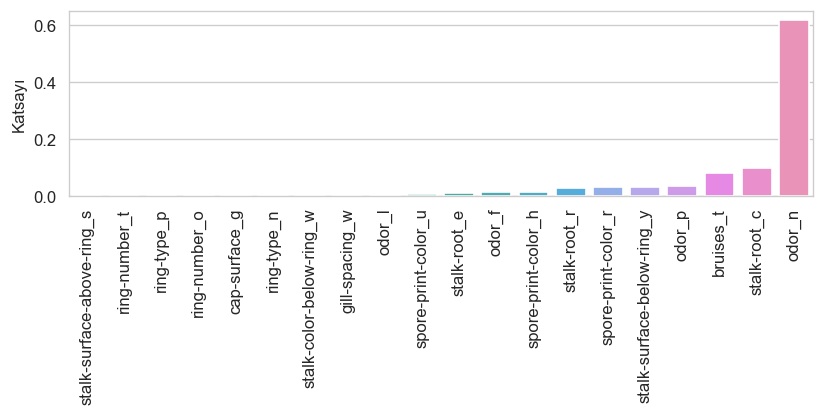

In [48]:
plt.figure(figsize=(8,2), dpi=120)

sns.set_style('whitegrid')

sns.barplot(x = feat_df.sort_values('Katsayı').index,
           y='Katsayı', data = feat_df.sort_values('Katsayı'))
plt.xticks(rotation=90);